# 2부 신경망과 딥러닝

p.350

# 10. 케라스를 사용한 인공 신경망 소개

p.351

## 1. 생략

## 2. 케라스로 다층 퍼셉트론 구현하기 

### 1. 텐서플로우 설치

* 설치 완료

### 2. 시퀀셜 API를 사용하여 이미지 분류기 만들기 

* 패션 MNIST 데이터 이용

In [2]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [3]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
# 특성 스케일링

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
# y_train은 숫자 라벨, 정확한 라벨 지정이 필요
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[0]]

'Coat'

참고 : 하이퍼 파라미터 갯수

* 입력데이터가 28 * 28 사이즈
* 은닉층이 300 사이즈
* 가중치 300개
* 따라서 최종 파라미터는 ```28 * 28 * 300 + 300```
* 가중치 파라미터가 있다는걸 생각해야함

In [9]:
# 모델 생성, 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [13]:
weights, biases = hidden1.get_weights() # 첫번째 은닉층의 초기 가중치, 편향
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.02261573 -0.00483678  0.06030057 ...  0.05531289  0.01990859
  -0.0539845 ]
 [-0.02860873  0.01165161  0.03260668 ... -0.04193401 -0.07387442
   0.05382681]
 [-0.06730554  0.03318278  0.00536086 ... -0.05477669 -0.07336121
  -0.02859459]
 ...
 [ 0.01604614 -0.05070014 -0.01977684 ...  0.0299964  -0.05279319
  -0.06868849]
 [ 0.02835996 -0.06097573 -0.01141511 ... -0.07334358 -0.05264599
   0.01435699]
 [ 0.03206318 -0.03784311  0.0461437  ...  0.06474936 -0.01378744
   0.05318072]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [14]:
# 모델 컴파일 

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

참고 : sparse_categorical_crossentropy와 categorical_crossentropy의 차이점

* 샘플마다 타겟 클레스가 하나 이면(예를들어 1번샘플의 정답 = 9, 2번샘플의 정답 = 3) sparse ~ 사용
* 샘플마다 타겟 클래스가 원핫 인코딩 벡터형태면(1번 샘플의 정답 = (0,1,0,0), 2번 샘플의 정답 = (1,0,0,0)) categorical ~ 사용
    * 원 핫 벡터 변환 함수 : keras.utils.to_categorical()
    * 반대는 np.argmax(axis = 1)를 이용해 사용

optimizer = sgd는 경사 하강법을 이용해 훈련 한다는 의미

metrics = ['accuracy']는 분류 문제이기 때문에 이러한 형태로 지정

참고 : model.fit() 메서드 

* fit() 메서드는 마지막으로 실행한 파라미터 값을 기억한다, 따라서 다시 실행하게 되면 마지막에 최적화된 파라미터에서 시작함

In [15]:
# 모델 훈련과 평가

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 1s 794us/step - loss: 0.7104 - accuracy: 0.7650 - val_loss: 0.5401 - val_accuracy: 0.8186
Epoch 2/30
1719/1719 [==============================] - 1s 722us/step - loss: 0.4862 - accuracy: 0.8302 - val_loss: 0.4393 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 1s 725us/step - loss: 0.4412 - accuracy: 0.8457 - val_loss: 0.4278 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 1s 703us/step - loss: 0.4132 - accuracy: 0.8544 - val_loss: 0.3998 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 1s 704us/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 0.4285 - val_accuracy: 0.8460
Epoch 6/30
1719/1719 [==============================] - 1s 724us/step - loss: 0.3775 - accuracy: 0.8667 - val_loss: 0.3619 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 1s 704us/step - loss: 0.3649 - accuracy: 0.8708 - val_loss: 0.3888 - val_accura

클래스 분포가 편중되어있다면 fit()메서드를 호출할때 class_weight 매개변수를 지정할 수 잇다

In [16]:
# 결과 확인
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.710417,0.764964,0.540105,0.8186
1,0.486248,0.830182,0.439281,0.8528
2,0.441207,0.845709,0.427818,0.8520
3,0.413176,0.854400,0.399828,0.8596
4,0.394144,0.861818,0.428495,0.8460
5,0.377473,0.866655,0.361879,0.8718
6,0.364878,0.870764,0.388803,0.8648
7,0.352653,0.874927,0.364463,0.8744
8,0.341171,0.879618,0.350784,0.8748
9,0.332204,0.880164,0.353715,0.8760


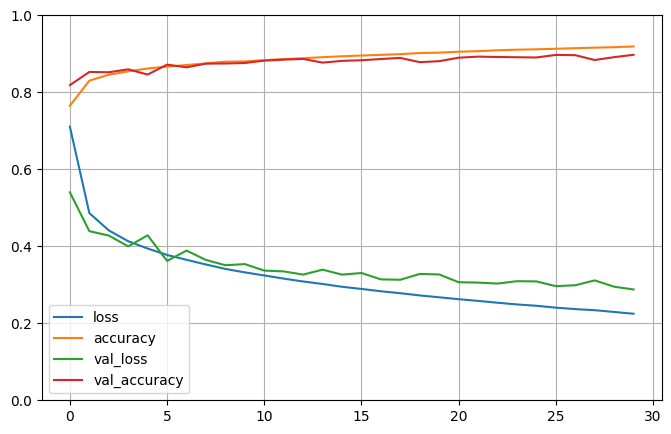

In [17]:
# 결과 시각화

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
# test 데이터셋 평가

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 478us/step - loss: 0.3236 - accuracy: 0.8806


[0.32363757491111755, 0.8805999755859375]

In [19]:
# 훈련된 모델을 사용해 예측

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 33ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
# 훈련된 모델을 사용해 예측, 이때는 결과값으로 가장 높은 확률의 class가 나온다
import numpy as np

# y_pred = model.predict_classes(X_new) tensorflow 버전 2.6이후로 사라짐
y_pred = np.argmax(model.predict(X_new), axis = 1)
print(y_pred)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 9ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


### 3. 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기 

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target) # size를 지정하지않으몀 75대 25비율로 나뉘어진다
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [22]:
# 데이터셋에 잡음이 많아서 과대적합을 막는 용도로 뉴런 수가 적은 은닉층 하나만 사용

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 0s 493us/step - loss: 1.2612 - val_loss: 0.5707
Epoch 2/20
363/363 [==============================] - 0s 371us/step - loss: 0.5135 - val_loss: 0.4927
Epoch 3/20
363/363 [==============================] - 0s 372us/step - loss: 0.4669 - val_loss: 0.4552
Epoch 4/20
363/363 [==============================] - 0s 383us/step - loss: 0.4501 - val_loss: 0.4422
Epoch 5/20
363/363 [==============================] - 0s 374us/step - loss: 0.4340 - val_loss: 0.4234
Epoch 6/20
363/363 [==============================] - 0s 368us/step - loss: 0.4213 - val_loss: 0.4167
Epoch 7/20
363/363 [==============================] - 0s 369us/step - loss: 0.4124 - val_loss: 0.4133
Epoch 8/20
363/363 [==============================] - 0s 370us/step - loss: 0.4052 - val_loss: 0.4076
Epoch 9/20
363/363 [==============================] - 0s 368us/step - loss: 0.4003 - val_loss: 0.5186
Epoch 10/20
363/363 [==============================] - 0s 369us/step - loss: 0.397

3.304077386856079

In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
np.mean((y_pred[:3] - y_test[:3])**2)

1/1 [==============================] - 0s 18ms/step


14.310539179674484

### 4. 함수형 API를 이용해 복잡한 모델 만들기 

In [24]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs=[output])

model.compile(loss = 'mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 0s 547us/step - loss: 4.1712 - val_loss: 852.1473
Epoch 2/20
363/363 [==============================] - 0s 352us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 350us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 353us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 347us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 349us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 352us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 349us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 347us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 351us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==========

nan

In [25]:
input_A = keras.layers.Input(shape = [5], name='wide_input')
input_B = keras.layers.Input(shape = [6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs = [input_A, input_B], outputs=[output])

In [26]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 0s 513us/step - loss: 2.3100 - val_loss: 1.0370
Epoch 2/20
363/363 [==============================] - 0s 371us/step - loss: 0.8362 - val_loss: 0.7301
Epoch 3/20
363/363 [==============================] - 0s 369us/step - loss: 0.6806 - val_loss: 0.6425
Epoch 4/20
363/363 [==============================] - 0s 366us/step - loss: 0.6199 - val_loss: 0.5978
Epoch 5/20
363/363 [==============================] - 0s 373us/step - loss: 0.5839 - val_loss: 0.5664
Epoch 6/20
363/363 [==============================] - 0s 358us/step - loss: 0.5575 - val_loss: 0.5459
Epoch 7/20
363/363 [==============================] - 0s 371us/step - loss: 0.5375 - val_loss: 0.5259
Epoch 8/20
363/363 [==============================] - 0s 364us/step - loss: 0.5214 - val_loss: 0.5123
Epoch 9/20
363/363 [==============================] - 0s 363us/step - loss: 0.5083 - val_loss: 0.4998
Epoch 10/20
363/363 [==============================] - 0s 361us/step - loss: 0.498

0.745054304599762

In [27]:
# 보조출력 추가 

input_A = keras.layers.Input(shape = [5], name='wide_input')
input_B = keras.layers.Input(shape = [6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2) # 보조 출력
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [28]:
# 보조출력을 추가한 모델 컴파일 방법

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd') # 주출력의 가중치를 0.9, 보조출력의 가중치를 0.1로 두어서 주출력 위주로 모델을 훈련하도록 만듬

In [29]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20


363/363 [==============================] - 0s 624us/step - loss: 0.9528 - main_output_loss: 0.8263 - aux_output_loss: 2.0916 - val_loss: 0.6304 - val_main_output_loss: 0.5624 - val_aux_output_loss: 1.2416
Epoch 2/20
363/363 [==============================] - 0s 423us/step - loss: 0.5452 - main_output_loss: 0.4824 - aux_output_loss: 1.1107 - val_loss: 0.5195 - val_main_output_loss: 0.4617 - val_aux_output_loss: 1.0404
Epoch 3/20
363/363 [==============================] - 0s 417us/step - loss: 0.5143 - main_output_loss: 0.4644 - aux_output_loss: 0.9636 - val_loss: 0.4925 - val_main_output_loss: 0.4470 - val_aux_output_loss: 0.9022
Epoch 4/20
363/363 [==============================] - 0s 419us/step - loss: 0.5025 - main_output_loss: 0.4622 - aux_output_loss: 0.8651 - val_loss: 0.4843 - val_main_output_loss: 0.4447 - val_aux_output_loss: 0.8402
Epoch 5/20
363/363 [==============================] - 0s 417us/step - loss: 0.4833 - main_output_loss: 0.4479 - aux_output_loss: 0.8025 - val_loss:

In [30]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 333us/step - loss: 5.6859 - main_output_loss: 5.7197 - aux_output_loss: 5.3818


In [31]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 25ms/step


### 5. 서브클래싱 API로 동적 모델 만들기 

* 시퀀셜 API와 함수형 API는 모두 선언적, 사용할 층과 연결 방식을 먼저 정의해야함
* 모델에 반복문을 추가할수도 있고 다양한 크기를 다루려면 서브클래싱 API를 사용해야함

한계
* 모델을 저장하거나 복사할 수 없다
* summary() 메서드를 호출하면 층의 목록만 나열되고 층 간의 연결 정보를 얻을 수 없다.

In [32]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

### 6. 모델 저장과 복원

```python
# model save
model = keras.models.Sequential([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

# model load
model = keras.models.load_model('my_keras_model.h5')
```

### 7. 콜백 사용하기

* fit() 메서드의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 저장 가능
* 예를들어 ModelCheckppoint는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장, 기본적으로 매 에포크의 끝에서 호출

```python 
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs = 10, callbacks=[checkpoint_cb])

# 최상 결과(검증세트에서, 따라서 validation_data 지정이 필요)만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10, 
                    validation_data = (X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')

# 모델의 개선이 없을경우 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

# 사용자 정의 콜백 
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train : {:.2f}'.format(logs['val_loss'] /  logs['loss']))
```

### 8. 텐서보드를 사용해 시각화하기 
생략

## 3. 신경망 하이퍼파라미터 튜닝하기 

In [33]:
def build_model(n_hidden = 1, n_neurons = 30, lerangin_rate = 3e-3, input_shape=[8]):
    model = keras.model.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lerangin_rate=lerangin_rate)
    model.compile(loss = 'mse', optimizer=optimizer)
    return model

In [34]:
keras.wrappers

AttributeError: module 'keras.api._v2.keras' has no attribute 'wrappers'

## 15. RNN과 CNN을 사용해 시퀀스 처리하기

### 15.3 시계열 예측하기

p.604

In [ ]:
# 시계열 데이터 생성 함수
import numpy as np

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
# time_stpes 이 50개인 데이터 10000개
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### 15.3.1 기준 성능

* naive forecast 보다 좋아야지 모델을 사용하는 의미가 있다

In [ ]:
import keras
# 마지막값을 

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020081257

In [ ]:
# 완전 연결 네트워크를 사용한 예측

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]), # flatten 계층이 없으면 y_pred는 (2000, 50, 1)로 출력됨
    keras.layers.Dense(1)
])
model.compile(optimizer='Adam', loss = 'mse')
model.fit(X_train, y_train, epochs=20)
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

Epoch 1/20
219/219 [==============================] - 0s 470us/step - loss: 0.1074
Epoch 2/20
219/219 [==============================] - 0s 527us/step - loss: 0.0401
Epoch 3/20
219/219 [==============================] - 0s 312us/step - loss: 0.0241
Epoch 4/20
219/219 [==============================] - 0s 308us/step - loss: 0.0178
Epoch 5/20
219/219 [==============================] - 0s 303us/step - loss: 0.0145
Epoch 6/20
219/219 [==============================] - 0s 313us/step - loss: 0.0123
Epoch 7/20
219/219 [==============================] - 0s 312us/step - loss: 0.0105
Epoch 8/20
219/219 [==============================] - 0s 306us/step - loss: 0.0091
Epoch 9/20
219/219 [==============================] - 0s 307us/step - loss: 0.0079
Epoch 10/20
219/219 [==============================] - 0s 307us/step - loss: 0.0070
Epoch 11/20
219/219 [==============================] - 0s 305us/step - loss: 0.0062
Epoch 12/20
219/219 [==============================] - 0s 300us/step - loss: 0.0056
E

0.0040120278

### 15.3.2 간단한 RNN 구현하기 

In [ ]:
import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None, 1])
])
model.compile(optimizer='Adam', loss='mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

63/63 [==============================] - 0s 744us/step


0.14080665

### 15.3.3 심층 RNN

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]), # 각 시점에서 결과값이 20개가 나온다
    keras.layers.SimpleRNN(20, return_sequences= True), # 각 시점에서 결과값이 20개 
    keras.layers.SimpleRNN(1), # 마지막 층에서는 return_sequences를 정의할 필요 없다
])
model.compile(optimizer='Adam', loss = 'mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

63/63 [==============================] - 0s 2ms/step


0.008754198

In [ ]:
X_train.shape

(7000, 50, 1)

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]), # 각 시점에서 결과값이 20개가 나온다
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1),
])
model.compile(optimizer='Adam', loss = 'mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

63/63 [==============================] - 0s 2ms/step


0.0040185642

In [ ]:
# 직접 실행하며 어떤식으로 연산이 되는지 확인

rnn1 = keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1])
hidden_state1 = rnn1(X_train)
print(hidden_state1.shape)

rnn2 = keras.layers.SimpleRNN(20)
hidden_state2 = rnn2(hidden_state1)
print(hidden_state2.shape)

dense1 = keras.layers.Dense(1)
res = dense1(hidden_state2)
print(res.shape)

(7000, 50, 20)
(7000, 20)
(7000, 1)


### 15.4.3 여러 타임 스텝 앞을 예측하기

* 첫번째 방법 : 이미 훈련된 모델을 사용하여 다음값을 예측한 다음 이 값을 입력으로 추가하여 새롭게 그 다음값을 예측
* 두번째 방법 : RNN을 훈련하여 다음 값 10개를 한 번에 예측하는것, 시퀀스-투-벡터 모델을 사용

In [ ]:
# 첫번째 방법
n_steps = 50
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
Y_pred = X[:, n_steps:]
np.mean(keras.losses.mse(Y_new, Y_pred))

1/1 [==============================] - 0s 9ms/step


0.042548746

In [ ]:
# 두번째 방법

series = generate_time_series(10000, n_steps + 10)
series.shape
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0] # series[:7000, -10:, 0] : (7000, 10) series[:7000, -10:] : (7000, 10, 1 )
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
# 시퀀스 데이터 생성

Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead -1] = series[:, step_ahead:step_ahead + n_steps, 0]

Y_train = Y[:7000] 
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))    
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(optimizer='Adam', loss='mse', metrics=[last_time_step_mse])
model.fit(X_train, Y_train)

219/219 [==============================] - 2s 5ms/step - loss: 0.0671 - last_time_step_mse: 0.0676


In [ ]:
Y_pred = model.predict(X_valid)

63/63 [==============================] - 0s 2ms/step


In [ ]:
Y_train.shape

(7000, 50, 10)